# About the notebook
This notebook allows to train a 3D deep learning UNET architecture for the task of segmenting structures from a input image.

This code requires to provide the path of the folder containing the input images and the path of the folder containing the target (ground truth) images.

# 01 - Loading dependencies
Importing the required code and libraries to run this notebook

In [10]:
import os
if 'workbookDir' not in globals():
    print('Updating working directory')
    workbookDir = os.path.dirname(os.getcwd())
    os.chdir(workbookDir)
print(os.getcwd())

import numpy as np
import matplotlib.pyplot as plt
from deeptube_3dcenterline.UNet_3D.Training_Dataset_Loader import trainingset_dataset_3D as train_loader_3d
from deeptube_3dcenterline.UNet_3D.unet3d_model import UNet_3D
from deeptube_3dcenterline.parameters_widget import parameters_UNET_training
from torch.utils.data import DataLoader


%load_ext autoreload
%autoreload 2

C:\Users\jalip\Documentos\github\deeptube_3dcenterline
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 02 - Setting parameters
The following line of code allows you to set the parameters for training the deep learning UNET model

## Required parameters
**Folder path input images**: the folder containing the input images 

**Folder path target mask**: the folder containing the traces center-line for each input image

In [3]:
parameters = parameters_UNET_training()

------------------------------
REQUIRED PARAMETERS
------------------------------


# 03 - Display samples of training image and target mask
This sections allows to visualize some samples from the training set and associated target mask

In [43]:
training_data = train_loader_3d(parameters['folder_input_w'].value, parameters['folder_target_w'].value)
print('Number of samples in training set: ' + str(len(training_data)))

Number of samples in training set: 1200


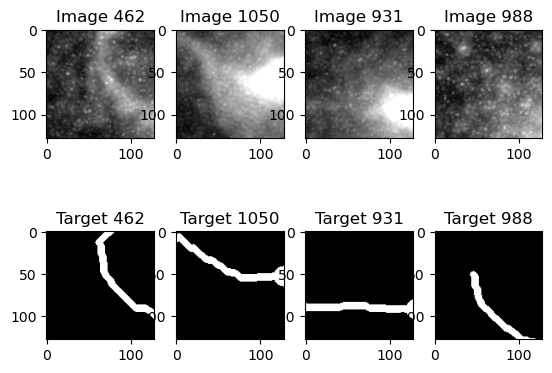

In [41]:
figure = plt.figure()
n_images_to_display = 4
k = 0
for index in np.random.randint(0, len(training_data), size = n_images_to_display):
    k = k+1
    img, target = training_data.__getitem__(index)
    
    plt.subplot(2, n_images_to_display, k)
    plt.imshow(np.squeeze(img).max(axis=0), cmap='gray')
    plt.title('Image ' + str(index))
    
    plt.subplot(2, n_images_to_display, k+n_images_to_display)
    plt.imshow(np.squeeze(target).max(axis=0), cmap='gray')
    plt.title('Target ' + str(index))    
    

In [42]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([64, 1, 20, 128, 128])
Labels batch shape: torch.Size([64, 1, 20, 128, 128])
